## Scraping reviews from Rotten Tomatoes and Building a Prediction Model

I will be using Python libraries to first scrape movie reviews from the rotten tomatoes website.
Thereafter I will build two classification models to classify the reviews as 'fresh' (positive) or 'rotten' (negative).

In [ ]:
import time
import pandas as pd
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.common.exceptions import NoSuchElementException
from selenium.webdriver.common.by import By

In [3]:
path = "C:\Program Files\chromedriver"
s=Service(path)
browser = webdriver.Chrome(service=s)

## Scraping movie reviews from Rotten Tomatoes

In [4]:
#creating a function to check if the 'next page' button exists
def check_exists_by_xpath(xpath):
    try:
        browser.find_element(By.XPATH,xpath)
    except NoSuchElementException:
        return False
    return True

The list of extracted and cleaned movie names can be accessed by the following google sheet https://docs.google.com/spreadsheets/d/1hjKu8tq5UaVoFn3YFNil-ho9HkmUxmxIIlfMjmuvisg/edit?usp=share_link

In [8]:
movie = ['cars','fire_of_love', 'enola_holmes_2', 'all_quiet_on_the_western_front', 'causeway', 'the_good_nurse', 'sissy', 'enola_holmes', 'wendell_&_wild', 'pearl', 'everything_everywhere_all_at_once', 'inside_man', 'soft_&_quiet', 'the_northman', 'the_batman', 'werewolf_by_night', 'the_innocents', 'the_bad_guys', 'confess,_fletch', 'mrs._harris_goes_to_paris', 'avatar', 'elvis', 'prey', 'hellbender', 'argentina,_1985', 'hereditary', 'the_lost_city', 'vengeance', 'avengers:_endgame', 'speak_no_evil', 'interstellar', 'it_follows', 'you_won\'t_be_alone', 'good_luck_to_you,_leo_grande', 'do_revenge', 'his_house', 'piggy', 'knives_out', 'hustle', 'vesper', 'the_outfit', 'the_gentlemen', 'dune', 'get_out', 'let_the_right_one_in', 'midsommar', 'marcel_the_shell_with_shoes_on', 'greenland', 'we\'re_all_going_to_the_world\'s_fair', 'thirteen_lives', 'the_power_of_the_dog', 'shang-chi_and_the_legend_of_the_ten_rings', 'the_dark_knight', 'the_witch', 'mad_god', 'saloum', 'last_night_in_soho', 'rosaline', 'pig', 'lightyear', 'marvel\'s_the_avengers', 'jungleland', 'coco', 'paddington_2', 'fight_club', 'the_suicide_squad', 'avengers:_infinity_war', 'a_hero', 'it', 'in_bruges', 'whiplash', 'nobody', 'star_wars:_the_last_jedi', 'parasite', 'happening', 'no_time_to_die', 'captain_marvel', 'us', 'catherine_called_birdy', 'doctor_sleep', 'blade_runner_2049', 'what_josiah_saw', 'operation_mincemeat', 'halloween', 'v_for_vendetta', 'fresh', 'call_me_by_your_name', 'up_in_the_air', 'nightmare_alley', 'the_shawshank_redemption', 'shazam!', 'coraline', 'back_to_the_future', 'still_alice', 'run', '1917', 'the_nice_guys', 'black_widow', 'the_babadook', 'i\'m_thinking_of_ending_things', 'notting_hill', 'malignant', 'athena', 'the_lord_of_the_rings:_the_two_towers', 'hatching', 'the_invitation', 'the_french_dispatch', 'the_shining', 'the_rental', 'the_godfather', 'the_nightmare_before_christmas', 'turning_red', 'leave_no_trace', 'resurrection', 'free_guy', 'the_sadness', 'the_terminator', 'coda', 'the_pledge', 'v/h/s/99', 'once_upon_a_time..._in_hollywood', 'titanic', 'spider-man:_into_the_spider-verse', 'the_conjuring', 'iron_man', 'the_night_house', 'the_green_knight', 'ingrid_goes_west', 'the_last_duel', 'the_exorcist', 'the_lord_of_the_rings:_the_fellowship_of_the_ring', 'annihilation', 'downton_abbey:_a_new_era', 'spirited_away', 'to_leslie', 'candyman', 'louis_armstrong\'s_black_&_blues', 'harry_potter_and_the_sorcerer\'s_stone', 'godzilla_vs._kong', 'host', 'the_lighthouse', 'arrival', 'ad_astra', 'boiling_point', 'john_wick', 'el_camino:_a_breaking_bad_movie', 'the_handmaiden', 'hell_or_high_water', 'lamb', 'slash/back', '28_days_later', 'a_quiet_place_part_ii', 'the_courier', 'a_quiet_place', 'uncut_gems', 'wind_river', 'the_invisible_man', 'you_are_not_my_mother', 'the_sea_beast', 'encanto', 'rogue_one:_a_star_wars_story', 'prisoners', 'eyes_wide_shut', 'the_lost_daughter', 'the_favourite', 'inception', 'django_unchained', 'baby_driver', 'little_women', 'the_square', 'pulp_fiction', 'man_from_reno', 'dunkirk', 'spider-man:_far_from_home', 'cha_cha_real_smooth', 'seven', 'the_wolf_of_wall_street', 'the_lord_of_the_rings:_the_return_of_the_king', 'belfast', 'thor:_ragnarok', 'margin_call', 'manchester_by_the_sea', 'captain_america:_civil_war', 'after_yang', 'sicario', 'three_billboards_outside_ebbing,_missouri', 'promising_young_woman', 'a_christmas_story', 'drive_my_car', 'captain_america:_the_first_avenger', 'mandy', 'hush', 'the_harder_they_fall', 'the_fallout', 'the_grand_budapest_hotel', 'the_wailing', 'no_country_for_old_men', 'sexy_beast', 'ford_v_ferrari', 'the_hunger_games', 'sorry_to_bother_you', 'hacksaw_ridge', 'jojo_rabbit', 'the_silence_of_the_lambs', 'herself', 'train_to_busan', 'gladiator', 'the_irishman', 'the_truman_show', 'raw', 'toy_story', 'the_cabin_in_the_woods', 'eternal_sunshine_of_the_spotless_mind', 'deadpool', 'drive', 'gerald\'s_game', 'collateral', 'the_texas_chain_saw_massacre', 'how_to_train_your_dragon', 'schindler\'s_list', 'hunt_for_the_wilderpeople', 'star_wars:_episode_iii_--_revenge_of_the_sith', 'captain_america:_the_winter_soldier', 'the_killing_of_a_sacred_deer', 'logan', 'avengers:_age_of_ultron', 'scream', 'star_wars:_the_force_awakens', 'harry_potter_and_the_deathly_hallows:_part_2', 'la_la_land', 'jujutsu_kaisen_0:_the_movie', 'nightcrawler', 'primal_fear', 'let_him_go', 'memento', '1922', 'if_beale_street_could_talk', 'john_wick:_chapter_3_--_parabellum', 'guardians_of_the_galaxy', 'the_gift', 'spider-man:_homecoming', 'source_code', 'god\'s_country', 'kimi', 'the_green_mile', 'lady_bird', 'spencer', 'creed', 'the_big_sick', 'the_platform', 'tim_burton\'s_corpse_bride', 'snowpiercer', 'scary_stories_to_tell_in_the_dark', 'the_matrix', 'booksmart', '8_mile', 'ready_or_not', 'beetlejuice', 'while_we\'re_young', 'planes,_trains_and_automobiles', 'the_dark_knight_rises', 'edge_of_tomorrow', 'cruella', 'saving_private_ryan', 'shrek', 'good_will_hunting', 'alien', 'kung_fu_panda', 'taxi_driver', 'the_conjuring_2', 'old_henry', 'stalker', 'inglourious_basterds', 'mad_max:_fury_road', 'the_father', 'west_side_story', 'a_clockwork_orange', 'birds_of_prey_(and_the_fantabulous_emancipation_of_one_harley_quinn)', 'the_shape_of_water', 'fury', 'red_rocket', 'the_big_short', 'almost_famous', 'under_the_shadow', 'goodfellas', 'the_thing', 'wonder_woman', 'zootopia', 'ready_player_one', 'your_name', 'high_life', 'donnie_darko', 'pan\'s_labyrinth', 'tangerine', 'the_guard', 'iron_man_3', '2001:_a_space_odyssey', 'cars', 'this_is_the_end', 'her', 'the_descent', 'doctor_strange', 'state_of_play', 'tick,_tick..._boom!', 'ghostbusters', 'the_blair_witch_project', 'jurassic_park', 'the_lost_city_of_z', 'american_beauty', 'a_nightmare_on_elm_street', 'casino_royale', 'match_point', 'spider-man_2', 'bram_stoker\'s_dracula', 'mean_girls', 'skyfall', 'the_firm', 'children_of_men', 'king_richard', 'the_endless', 'road_to_perdition', 'the_card_counter']
pageNum = 3
title = []
critics = []
ratings = []
sources = []
texts = []
dates = []

for j in movie:
    browser.get("https://www.rottentomatoes.com/m/"+j+"/reviews")
    time.sleep(2)
    for i in range(0, pageNum):


        page_source = browser.page_source
        soup = BeautifulSoup(page_source, 'lxml')
        reviews_content = soup.find_all('div', class_='row review_table_row')

        for review in reviews_content:
            critic = review.find('a', class_='unstyled bold articleLink').text
            rating_ = review.find('div',class_ ='col-xs-16 review_container').div['class']
            rating = rating_[3]
            source = review.find('em', class_='subtle critic-publication').text.strip()
            text = review.find('div', class_='the_review').text.strip()
            date = review.find('div', class_='review-date subtle small').text.strip()

            if not critic:
                critic = "NA"
            if not rating:
                rating = "NA"
            if not source:
                source = "NA"
            if not text:
                text = "NA"
            if not date:
                date = "NA"

            title.append(j)
            critics.append(critic)
            ratings.append(rating)
            sources.append(source)
            texts.append(text)
            dates.append(date)

        if (check_exists_by_xpath('//button[@class="js-prev-next-paging-next btn prev-next-paging__button prev-next-paging__button-right"]')):
            browser.find_element(By.XPATH,'//button[@class="js-prev-next-paging-next btn prev-next-paging__button prev-next-paging__button-right"]').click()
            time.sleep(1)




In [9]:
data = {
    'movie_name':title,
    'critics':critics,
    'ratings':ratings,
    'sources':sources,
    'texts': texts,
    'dates':dates
}

df = pd.DataFrame(data)

In [10]:
df.shape

(11835, 6)

In [11]:
df

,movie_name,critics,ratings,sources,texts,dates
0,cars,Mike Massie,rotten,Gone With The Twins,The film's two-hour length is unbearable for a...,"Nov 15, 2020"
1,cars,Alberto Abuín,fresh,Espinof,An absolute wonder that... gives us almost two...,"Feb 12, 2020"
2,cars,Micheal Compton,fresh,Bowling Green Daily News,Children will love the Toy Story-like simplici...,"Nov 19, 2019"
3,cars,Matt Brunson,fresh,Film Frenzy,"The movie's Route 66 mythology, coupled with t...","Jun 20, 2019"
4,cars,Mattie Lucas,fresh,"The Dispatch (Lexington, NC)",Its simple elegy for a once-buzzing small town...,"Jun 5, 2019"
...,...,...,...,...,...,...
11830,the_card_counter,Matt Hudson,fresh,What I Watched Tonight,"Powered by Isaac's excellent performance, The ...","Nov 5, 2021"
11831,the_card_counter,Paul Whitington,fresh,Irish Independent,"This is a powerful, grimly substantial film, a...","Nov 4, 2021"
11832,the_card_counter,Raphael Abraham,fresh,Financial Times,The film-maker shows his unblunted gift for wr...,"Nov 3, 2021"
11833,the_card_counter,Peter Bradshaw,fresh,Guardian,"There's a horrible, queasy urgency to this hig...","Nov 3, 2021"


# Cleaning up the text

In [12]:
import nltk
from nltk.corpus import stopwords

In [13]:
stopword = nltk.corpus.stopwords.words('english')
stopword.append('I')
stopword.append('the')
stopword.append('The')

In [14]:
import string
punc = string.punctuation

In [15]:
#removing stopwords
df['texts'] = df['texts'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in (stopword)]))

In [16]:
#removing punctuations
def remove_punctuation(text):
    no_punct=[words for words in text if words not in punc]
    words_wo_punct=''.join(no_punct)
    return words_wo_punct
df['texts']=df['texts'].apply(lambda x: remove_punctuation(x))

In [17]:
df.head()

,movie_name,critics,ratings,sources,texts,dates
0,cars,Mike Massie,rotten,Gone With The Twins,films twohour length unbearable animated feature,"Nov 15, 2020"
1,cars,Alberto Abuín,fresh,Espinof,absolute wonder that gives us almost two hours...,"Feb 12, 2020"
2,cars,Micheal Compton,fresh,Bowling Green Daily News,Children love Toy Storylike simplicity adults ...,"Nov 19, 2019"
3,cars,Matt Brunson,fresh,Film Frenzy,movies Route 66 mythology coupled presence Pau...,"Jun 20, 2019"
4,cars,Mattie Lucas,fresh,"The Dispatch (Lexington, NC)",simple elegy oncebuzzing small town bypassed i...,"Jun 5, 2019"


In [18]:
#checking for nulls
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11835 entries, 0 to 11834
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   movie_name  11835 non-null  object
 1   critics     11835 non-null  object
 2   ratings     11835 non-null  object
 3   sources     11835 non-null  object
 4   texts       11835 non-null  object
 5   dates       11835 non-null  object
dtypes: object(6)
memory usage: 554.9+ KB


## EDA

In [ ]:
import os
import numpy as np
import pandas as pd
import math
import matplotlib.pylab as plt
import seaborn as sns

%matplotlib inline
sns.set(style='ticks', palette='Set2')

In [76]:
#checking the number of unique movies
n = len(pd.unique(df['movie_name']))
print(f'There are {n} distinct movies in our review set')

There are 213 distinct movies in our review set


In [72]:
#movies and the number of reviews for each
df.groupby('movie_name').size().sort_values(ascending=False)


movie_name
cars             120
28_days_later     60
scream            60
seven             60
sexy_beast        60
                ... 
spencer            3
wind_river         3
arrival            3
ready_or_not       3
pig                3
Length: 213, dtype: int64

In [73]:
#top 20 movies with most number of reviews
b = df.groupby('movie_name').size().sort_values(ascending=False)
b.head(20)

movie_name
cars                       120
28_days_later               60
scream                      60
seven                       60
sexy_beast                  60
shrek                       60
sissy                       60
skyfall                     60
snowpiercer                 60
sorry_to_bother_you         60
source_code                 60
spirited_away               60
still_alice                 60
taxi_driver                 60
the_babadook                60
the_batman                  60
the_big_short               60
the_big_sick                60
the_blair_witch_project     60
the_cabin_in_the_woods      60
dtype: int64

In [123]:
df.groupby('ratings').size()

ratings
fresh     10440
rotten     1395
dtype: int64

C:\Users\Devaki\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


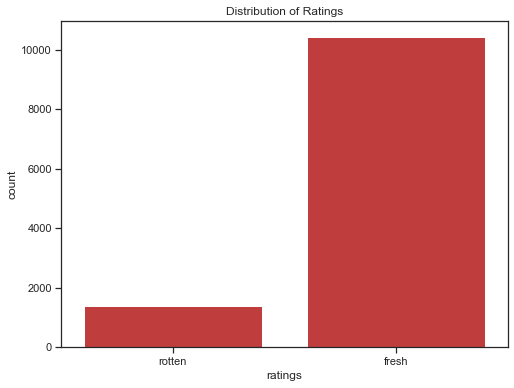

In [47]:
#Distribution of positive and negative ratings
#we notice there is a major class imbalance, with majority reviews belonging to the 'fresh' or positive class
plt.figure(figsize = (8,6))
sns.countplot(df['ratings'], color = 'tab:red')
plt.title('Distribution of Ratings')
plt.show()

Out of 11835 reviews, 10440 are of the class ‘fresh’ or positive, while only 1395 are of the class ‘rotten’ or negative. Due to this class imbalance, when we are evaluating our model performance we cannot only look at accuracy as a measure and will need to look at precision and recall to get a more accurate picture of our model’s performance. 

In [ ]:
ax.bar_label(ax.containers[0])

In [54]:
#Checking the count of each review source
df.groupby('sources').size().sort_values(ascending=False)

sources
Gone With The Twins                    102
Deep Focus Review                      101
Keith & the Movies                      83
Espinof                                 75
Cinemaficionados                        67
                                      ... 
Diario La Estrella (Fort Worth, TX)      1
Screen Comment                           1
Doddle                                   1
Dolores Quintana                         1
Dayton Daily News                        1
Length: 1460, dtype: int64

In [55]:
#Top 15 sources
source_count = df.groupby('sources').size().sort_values(ascending=False)
source_count.head(15)

sources
Gone With The Twins         102
Deep Focus Review           101
Keith & the Movies           83
Espinof                      75
Cinemaficionados             67
Film Frenzy                  60
Battleship Pretension        58
Rob's Movie Vault            57
Time Out                     57
TheIndependentCritic.com     56
Common Sense Media           53
Reel Film Reviews            53
Radio Times                  53
Times (UK)                   52
Guardian                     51
dtype: int64

In [61]:
a = source_count.head(15)


<AxesSubplot:ylabel='sources'>

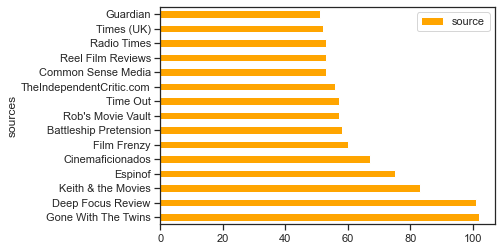

In [68]:
a = pd.DataFrame(a, columns=['source'])
a.plot(kind='barh', color='orange')

In [91]:
#converting the dates to date/time format so we can extract the years
df['dates'] = pd.to_datetime(df['dates'])
df['year'] = df['dates'].dt.to_period('y')

In [93]:
#counting the number of reviews per year
df_dates = df.groupby('year')[['ratings']].count()
df_dates = df_dates.reset_index() #reset the index
df_dates.columns = ['year', 'Review_count']




In [94]:
df_dates

,year,Review_count
0,2000,93
1,2001,87
2,2002,147
3,2003,159
4,2004,160
5,2005,126
6,2006,266
7,2007,204
8,2008,170
9,2009,173


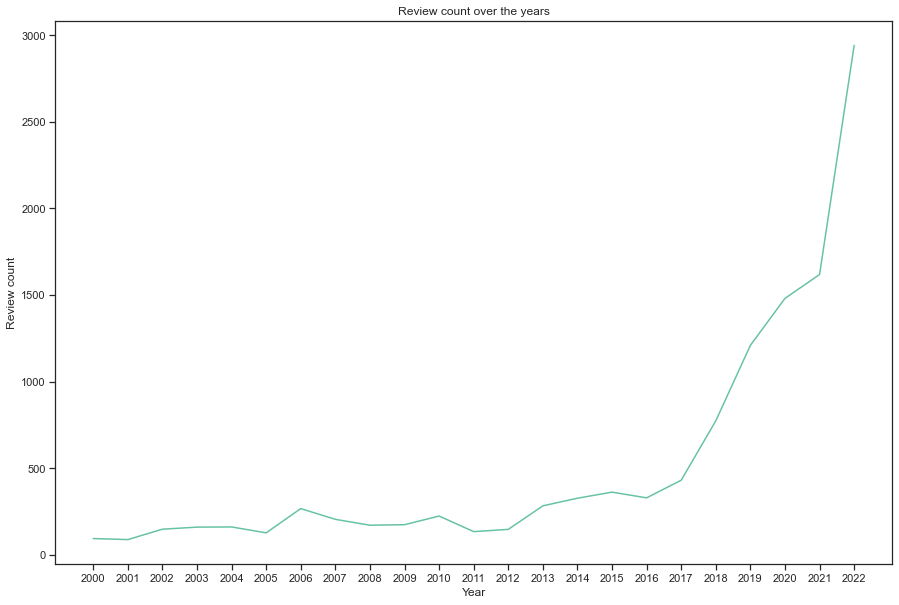

In [97]:
#plot the review count over the years
plt.figure(figsize = (15,10))
plt.plot(df_dates['year'].astype(str), 
         df_dates['Review_count']) 
plt.xlabel('Year')
plt.ylabel('Review count')
plt.title('Review count over the years')
plt.show()

## Building a Classifier

In [38]:
from sklearn.tree import DecisionTreeClassifier

X = df['texts']
Y0 = df['ratings']

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

# Import train, test, and evaluation functions
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

Since our reviews were text data, I had to perform the necessary steps in order to convert this data into numerical representations to feed into our classification model. I created a vectorizer that would track the text into binary features and then transform it into a numeric matrix. 

In [ ]:
# Create a vectorizer that will track text as binary features
binary_vectorizer = CountVectorizer(binary=True)

# Let the vectorizer learn what tokens exist in the text data
binary_vectorizer.fit(X)

# Turn these tokens into a numeric matrix
X_t = binary_vectorizer.transform(X)

In [39]:
X_train, X_test, Y0_train, Y0_test = train_test_split(X_t, Y0, train_size=0.70)

In [40]:
# Create an empty, unlearned tree
tree = DecisionTreeClassifier(criterion="entropy")

# Fit/train the tree on the training data
tree.fit(X_train, Y0_train)

# Get a prediction from the tree on the test data
Y0_test_predicted = tree.predict(X_test)

# Get the accuracy of this prediction
accuracy = accuracy_score(Y0_test_predicted, Y0_test)

# Print the accuracy
print("The accuracy is " + str(accuracy))

The accuracy is 0.8583497606308083


In [41]:
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(Y0_test, Y0_test_predicted))
print(classification_report(Y0_test, Y0_test_predicted))

[[2945  172]
 [ 331  103]]
              precision    recall  f1-score   support

       fresh       0.90      0.94      0.92      3117
      rotten       0.37      0.24      0.29       434

    accuracy                           0.86      3551
   macro avg       0.64      0.59      0.61      3551
weighted avg       0.83      0.86      0.84      3551



Looking at our classification report we can see that precision and recall are very low for the rotten class but very high for the fresh class. Recall measures the sensitivity of our model, a low recall for ‘rotten’ indicates that there is the presence of a lot of false negatives in our model (negative in this case refers to ‘fresh’ or positive reviews). This means that many reviews are classified as positive even though they are not. 

It is important to think about why we are creating this model. Are we more interested in accurately identifying the positive or the negative reviews? If our class of interest in this case is the ‘fresh’ or positive classification, then I would recommend using this model. However, if we are more interested in the ‘rotten’ or negative class, and want to accurately identify which reviews fall under this category I would not recommend using this model. In order to improve the model performance it would be imperative to add more instances of the negative class. 


In [42]:
df0 = pd.DataFrame(X_test, columns=['Reviews'])

In [43]:
# get some predictions from the model

predictions_df = df0.assign(predictions=Y0_test_predicted )

predictions_df.head(5)

,Reviews,predictions
0,"(0, 1508)\t1\n (0, 2405)\t1\n (0, 2714)\t1...",fresh
1,"(0, 1809)\t1\n (0, 3033)\t1\n (0, 4226)\t1...",fresh
2,"(0, 828)\t1\n (0, 2415)\t1\n (0, 4201)\t1\...",fresh
3,"(0, 862)\t1\n (0, 1166)\t1\n (0, 4582)\t1\...",fresh
4,"(0, 803)\t1\n (0, 886)\t1\n (0, 1687)\t1\n...",fresh


In [115]:
#saving the training data
training_data1 = pd.DataFrame(X_train, columns=['X_train'])

training_data = training_data1.assign(Y=Y0_train)


In [116]:
training_data

,X_train,Y
0,"(0, 118)\t1\n (0, 620)\t1\n (0, 11061)\t1\...",rotten
1,"(0, 12135)\t1",NaN
2,"(0, 7378)\t1\n (0, 9949)\t1\n (0, 11131)\t...",fresh
3,"(0, 2444)\t1\n (0, 2939)\t1\n (0, 3578)\t1...",fresh
4,"(0, 1729)\t1\n (0, 2197)\t1\n (0, 3039)\t1...",fresh
...,...,...
8279,"(0, 1434)\t1\n (0, 1850)\t1\n (0, 3288)\t1...",NaN
8280,"(0, 12135)\t1",rotten
8281,"(0, 3280)\t1\n (0, 3636)\t1\n (0, 3674)\t1...",fresh
8282,"(0, 774)\t1\n (0, 3027)\t1\n (0, 4403)\t1\...",NaN


In [120]:
training_data.to_csv(r'C:\\Users\\Devaki\\OneDrive - Fordham University\\Desktop\\Web analytics\\Python assignments\HW3_training_data.txt')

Link to training data
https://drive.google.com/file/d/1g1c_Z5fsngZ-pA47oSWBw9-_y3h2xMkf/view?usp=share_link


## Sentiment Analysis

In [19]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [20]:
def sentiment_analyzer_scores(texts):
   analyzer = SentimentIntensityAnalyzer()
   score = analyzer.polarity_scores(texts)
   return score['compound']

# apply the function to create the score column
df['score'] = df.texts.apply(lambda x: sentiment_analyzer_scores(x))

In [21]:
df.head(20)

,movie_name,critics,ratings,sources,texts,dates,score
0,cars,Mike Massie,rotten,Gone With The Twins,films twohour length unbearable animated feature,"Nov 15, 2020",0.0000
1,cars,Alberto Abuín,fresh,Espinof,absolute wonder that gives us almost two hours...,"Feb 12, 2020",0.5908
2,cars,Micheal Compton,fresh,Bowling Green Daily News,Children love Toy Storylike simplicity adults ...,"Nov 19, 2019",0.8402
3,cars,Matt Brunson,fresh,Film Frenzy,movies Route 66 mythology coupled presence Pau...,"Jun 20, 2019",-0.0772
4,cars,Mattie Lucas,fresh,"The Dispatch (Lexington, NC)",simple elegy oncebuzzing small town bypassed i...,"Jun 5, 2019",-0.2263
5,cars,Rachel Wagner,fresh,Rachel's Reviews (YouTube),Overall I enjoyed it,"Feb 21, 2019",0.5106
6,cars,Joel Siegel,fresh,Good Morning America,laugh cry get ticket 70 45mileanhour zone kind...,"Jan 5, 2018",0.5994
7,cars,James Plath,fresh,Movie Metropolis,Cars energy hearttwo things Robots lacked,"Oct 23, 2013",0.2732
8,cars,Joshua Starnes,rotten,ComingSoon.net,Cars nice homily small town life remembering p...,"Mar 10, 2011",0.8834
9,cars,Matthew Pejkovic,fresh,Matt's Movie Reviews,Unlike Pixar releases Cars cross adults well F...,"Jul 7, 2010",0.7430


In [22]:
def getAnalysis(score):
    if score<0:
        return 'Negative'
    elif score ==0:
        return 'Neutral'
    else:
        return 'Positive'
    
df['classify_sentiments'] = df['score'].apply(getAnalysis)

In [23]:
df.head()

,movie_name,critics,ratings,sources,texts,dates,score,classify_sentiments
0,cars,Mike Massie,rotten,Gone With The Twins,films twohour length unbearable animated feature,"Nov 15, 2020",0.0000,Neutral
1,cars,Alberto Abuín,fresh,Espinof,absolute wonder that gives us almost two hours...,"Feb 12, 2020",0.5908,Positive
2,cars,Micheal Compton,fresh,Bowling Green Daily News,Children love Toy Storylike simplicity adults ...,"Nov 19, 2019",0.8402,Positive
3,cars,Matt Brunson,fresh,Film Frenzy,movies Route 66 mythology coupled presence Pau...,"Jun 20, 2019",-0.0772,Negative
4,cars,Mattie Lucas,fresh,"The Dispatch (Lexington, NC)",simple elegy oncebuzzing small town bypassed i...,"Jun 5, 2019",-0.2263,Negative


C:\Users\Devaki\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


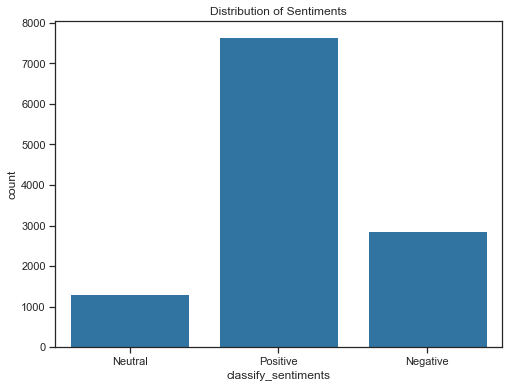

In [45]:
#looking at the distribution of ratings
#we notice there is a major class imbalance, with majority reviews belonging to the positive class
plt.figure(figsize = (8,6))
sns.countplot(df['classify_sentiments'], color = 'tab:blue')
plt.title('Distribution of Sentiments')
plt.show()

## Building a Classifier using Sentiment Analysis

Another decision tree classification model was built after performing a sentiment analysis on the data. By performing a sentiment analysis, each review was given a rating from -1 to 1. I classified all the ratings above 0 as positive, below 0 as negative and all those with a score of 0 as neutral. I then used this new dataset with the sentiment classification as the dependent variable to create our model. However, the accuracy of this model was 72%, which was lower than our original decision tree classifier.

In [25]:
from sklearn.tree import DecisionTreeClassifier

X = df['texts']
Y = df['classify_sentiments']



In [30]:
X_train, X_test, Y_train, Y_test = train_test_split(X_t, Y, train_size=0.70)

In [31]:
# Create an empty, unlearned tree
tree = DecisionTreeClassifier(criterion="entropy")

# Fit/train the tree on the training data
tree.fit(X_train, Y_train)

# Get a prediction from the tree on the test data
Y_test_predicted = tree.predict(X_test)

# Get the accuracy of this prediction
accuracy = accuracy_score(Y_test_predicted, Y_test)

# Print the accuracy
print("The accuracy is " + str(accuracy))

The accuracy is 0.7214869050971557


In [32]:
Y_test_predicted 

array(['Positive', 'Positive', 'Positive', ..., 'Positive', 'Positive',
       'Negative'], dtype=object)

In [33]:
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(Y_test, Y_test_predicted))
print(classification_report(Y_test, Y_test_predicted))

[[ 406  106  316]
 [  57  260   83]
 [ 252  175 1896]]
              precision    recall  f1-score   support

    Negative       0.57      0.49      0.53       828
     Neutral       0.48      0.65      0.55       400
    Positive       0.83      0.82      0.82      2323

    accuracy                           0.72      3551
   macro avg       0.62      0.65      0.63      3551
weighted avg       0.73      0.72      0.72      3551



In [34]:
df1 = pd.DataFrame(X_test, columns=['Reviews'])

In [35]:
df1.shape

(3551, 1)

In [36]:
# get some predictions from the model

predictions_df = df1.assign(predictions=Y_test_predicted )

predictions_df.head(5)


,Reviews,predictions
0,"(0, 1179)\t1\n (0, 1544)\t1\n (0, 2198)\t1...",Positive
1,"(0, 184)\t1\n (0, 3546)\t1\n (0, 6349)\t1\...",Positive
2,"(0, 7576)\t1\n (0, 8790)\t1\n (0, 10286)\t...",Positive
3,"(0, 1549)\t1\n (0, 1915)\t1\n (0, 2276)\t1...",Positive
4,"(0, 400)\t1\n (0, 3221)\t1\n (0, 4443)\t1\...",Neutral


In conclusion, our decision tree classifier has an accuracy of 86%. However, due to the major class imbalance in our training dataset our model can only accurately predict the reviews which fall under the positive class. There are many reviews that are incorrectly being classified as ‘fresh’ or positive. In order to improve our model we must add more instances of the negative class to our training dataset so that our model can learn from these instances. 